# Exercise 1

In [15]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Na    = 2
Rf    = 0.02 
mu    = np.array([0.05,0.15]).reshape((Na,1))
sigma = np.array([0.15,0.25]).reshape((Na,1))
b     = np.array([0.03,0.03]).reshape((Na,1))
rho   = 0.5
gamma = 1

mcov = np.array([sigma[0]**2,rho*sigma[0]*sigma[1],rho*sigma[0]*sigma[1],sigma[1]**2]).reshape((Na,Na))

In [17]:
def U_1asset(X0,X1,gamma,Rf,mu,sigma,b,id_asset,a): 
    U = Rf+X1*(mu[id_asset]-Rf)-0.5*gamma*sigma[id_asset]**2*X1**2-(X1-X0)*b[id_asset]*a
    return U
    
def X1_1asset(X0,gamma,mu,sigma,b,id_asset,a): 
    X1_o = (mu[id_asset]-Rf-b[id_asset]*a)/(gamma*sigma[id_asset]**2)
    U_o  = U_1asset(X0,X1_o,gamma,Rf,mu,sigma,b,id_asset,a)
    return X1_o,U_o

Np       = 1000
X0       = 1
X1_grd   = np.linspace(0.001,2,Np)
Ub_grd   = np.empty((Np,1))
Us_grd   = np.empty((Np,1))
id_asset = 1 
for i in range(Np): 
    Ub_grd[i] = U_1asset(X0,X1_grd[i],gamma,Rf,mu,sigma,b,id_asset,1)
    Us_grd[i] = U_1asset(X0,X1_grd[i],gamma,Rf,mu,sigma,b,id_asset,-1)
    
X1_ob,U_ob = X1_1asset(X0,gamma,mu,sigma,b,id_asset,1)
X1_os,U_os = X1_1asset(X0,gamma,mu,sigma,b,id_asset,-1)

TypeError: annotate() missing 1 required positional argument: 'text'

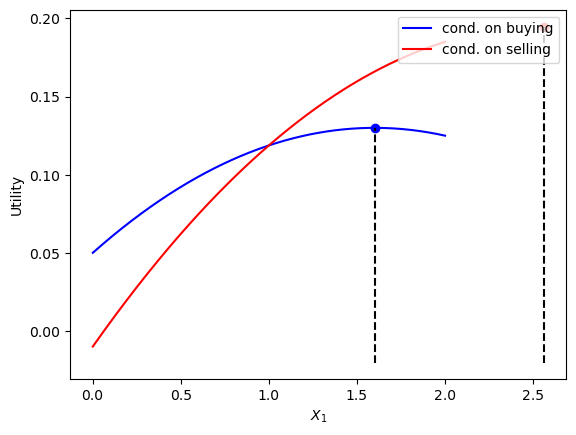

In [18]:

'''   
plt.plot(X1_grd,Ub_grd,'b-',label='cond. on buying')
plt.plot(X1_ob,U_ob,'bo')
plt.plot(X1_grd,Us_grd,'r-',label='cond. on selling')
plt.plot(X1_os,U_os,'ro')
axes = plt.gca()
ymin, ymax = axes.get_ylim()
plt.plot([X1_ob,X1_ob],[ymin,U_ob],'k--')
plt.plot([X1_os,X1_os],[ymin,U_os],'k--')
plt.xlabel('$X_1$')
plt.ylabel('Utility')
plt.legend(loc="upper right")
plt.annotate(s='', xy=(X1_ob,ymin), xytext=(X1_os,ymin), arrowprops=dict(arrowstyle='<->'))
axes.annotate('no-trade zone', xy=((X1_ob+X1_os)/2,ymin+0.005), xytext=((X1_ob+X1_os)/2,ymin+0.005), ha="center", va="bottom")
plt.show()
''' 
plt.plot(X1_grd, Ub_grd, 'b-', label='cond. on buying')
plt.plot(X1_ob[0], U_ob[0], 'bo')  # Accessing the first element
plt.plot(X1_grd, Us_grd, 'r-', label='cond. on selling')
plt.plot(X1_os[0], U_os[0], 'ro')  # Accessing the first element

axes = plt.gca()
ymin, ymax = axes.get_ylim()

plt.plot([X1_ob[0], X1_ob[0]], [ymin, U_ob[0]], 'k--')  # Accessing the first element
plt.plot([X1_os[0], X1_os[0]], [ymin, U_os[0]], 'k--')  # Accessing the first element

plt.xlabel('$X_1$')
plt.ylabel('Utility')
plt.legend(loc="upper right")

plt.annotate(s='', xy=(X1_ob[0], ymin), xytext=(X1_os[0], ymin), arrowprops=dict(arrowstyle='<->'))
axes.annotate('no-trade zone', xy=((X1_ob[0] + X1_os[0]) / 2, ymin + 0.005), xytext=((X1_ob[0] + X1_os[0]) / 2, ymin + 0.005), ha="center", va="bottom")

plt.show()

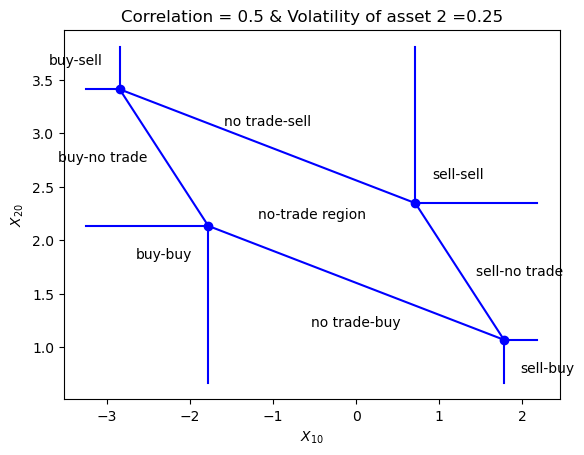

In [19]:
def U_2asset(X0,X1,gamma,Rf,mu,mcov,b,a): 
    U = Rf+X1.T@(mu-Rf)-0.5*gamma*(X1.T@(mcov@X1))-(X1-X0).T@np.multiply(b,a)
    return U

def X1_2T(X0,gamma,mu,mcov,b,a): 
    invcov = np.linalg.inv(mcov)
    X1_o = (invcov@(mu-Rf-np.multiply(b,a)))/gamma
    return X1_o

def X1_1T(X0_NT,gamma,mu,mcov,b,idx_T,a): 
    X1_T = (mu[idx_T]-Rf-b[idx_T]*a-mcov[0][1]*X0_NT)/(gamma*mcov[idx_T][idx_T])
    return X1_T

def trade_regions(X0,gamma,mu,rho,sigma,b): 
    Na = len(mu)
    mcov = np.array([sigma[0]**2,rho*sigma[0]*sigma[1],rho*sigma[0]*sigma[1],sigma[1]**2]).reshape((Na,Na))

    X1_bb = X1_2T(X0,gamma,mu,mcov,b,np.array([1,1]).reshape(Na,1))
    X1_bs = X1_2T(X0,gamma,mu,mcov,b,np.array([1,-1]).reshape(Na,1))
    X1_sb = X1_2T(X0,gamma,mu,mcov,b,np.array([-1,1]).reshape(Na,1))
    X1_ss = X1_2T(X0,gamma,mu,mcov,b,np.array([-1,-1]).reshape(Na,1))

    Delta = 0.4
    xmin = X1_bs[0]-Delta
    xmax = X1_sb[0]+Delta
    ymin = X1_sb[1]-Delta
    ymax = X1_bs[1]+Delta

    Np = 100
    BB1_x = np.linspace(xmin,X1_bb[0],Np)
    BB1_y = X1_bb[1]*np.ones((Np,1))
    BB2_x = X1_bb[0]*np.ones((Np,1))
    BB2_y = np.linspace(ymin,X1_bb[1],Np)

    SS1_x = np.linspace(X1_ss[0],xmax,Np)
    SS1_y = X1_ss[1]*np.ones((Np,1))
    SS2_x = X1_ss[0]*np.ones((Np,1))
    SS2_y = np.linspace(X1_ss[1],ymax,Np)

    BS1_x = np.linspace(xmin,X1_bs[0],Np)
    BS1_y = X1_bs[1]*np.ones((Np,1))
    BS2_x = X1_bs[0]*np.ones((Np,1))
    BS2_y = np.linspace(X1_bs[1],ymax,Np)

    SB1_x = np.linspace(X1_sb[0],xmax,Np)
    SB1_y = X1_sb[1]*np.ones((Np,1))

    SB2_x = X1_sb[0]*np.ones((Np,1))
    SB2_y = np.linspace(ymin,X1_sb[1],Np)

    NS_x = np.linspace(X1_bs[0],X1_ss[0],Np).reshape((Np,1))
    NS_y = np.empty((Np,1))
    for i in range(Np): NS_y[i] = X1_1T(NS_x[i],gamma,mu,mcov,b,1,-1)

    NB_x = np.linspace(X1_bb[0],X1_sb[0],Np).reshape((Np,1))
    NB_y = np.empty((Np,1))
    for i in range(Np): NB_y[i] = X1_1T(NB_x[i],gamma,mu,mcov,b,1,1)

    BN_x = np.empty((Np,1))
    BN_y = np.linspace(X1_bs[1],X1_bb[1],Np).reshape((Np,1))
    for i in range(Np): BN_x[i] = X1_1T(BN_y[i],gamma,mu,mcov,b,0,1)

    SN_x = np.empty((Np,1))
    SN_y = np.linspace(X1_ss[1],X1_sb[1],Np).reshape((Np,1))
    for i in range(Np): SN_x[i] = X1_1T(SN_y[i],gamma,mu,mcov,b,0,-1)

    plt.plot(X1_bb[0],X1_bb[1],'bo')
    plt.plot(X1_bs[0],X1_bs[1],'bo')
    plt.plot(X1_sb[0],X1_sb[1],'bo')
    plt.plot(X1_ss[0],X1_ss[1],'bo')
    plt.plot(BB1_x,BB1_y,'b-')
    plt.plot(BB2_x,BB2_y,'b-')
    plt.plot(SS1_x,SS1_y,'b-')
    plt.plot(SS2_x,SS2_y,'b-')
    plt.plot(BS1_x,BS1_y,'b-')
    plt.plot(BS2_x,BS2_y,'b-')
    plt.plot(SB1_x,SB1_y,'b-')
    plt.plot(SB2_x,SB2_y,'b-')
    plt.plot(NS_x,NS_y,'b-')
    plt.plot(NB_x,NB_y,'b-')
    plt.plot(BN_x,BN_y,'b-')
    plt.plot(SN_x,SN_y,'b-')
    plt.xlabel('$X_{10}$')
    plt.ylabel('$X_{20}$')
    axes = plt.gca()
    loc = (X1_bb[0]-0.2,X1_bb[1]-0.2)
    axes.annotate('buy-buy', 
                  xy=loc, 
                  xytext=loc, ha="right", va="top")
    loc = (X1_ss[0]+0.2,X1_ss[1]+0.2)
    axes.annotate('sell-sell', 
                  xy=loc, xytext=loc, ha="left", va="bottom")
    loc = (X1_bs[0]-0.2,X1_bs[1]+0.2)
    axes.annotate('buy-sell', xy=loc, xytext=loc, ha="right", va="bottom")
    loc = (X1_sb[0]+0.2,X1_sb[1]-0.2)
    axes.annotate('sell-buy', 
                  xy=loc, xytext=loc, ha="left", va="top")
    loc = ((X1_bs[0]+X1_ss[0])/2,(X1_bs[1]+X1_ss[1])/2+0.3)
    axes.annotate('no trade-sell', 
                  xy=loc, xytext=loc, ha="center", va="top")
    loc = ((X1_bb[0]+X1_sb[0])/2,(X1_bb[1]+X1_sb[1])/2-0.3)
    axes.annotate('no trade-buy', xy=loc, xytext=loc, ha="center", va="top")
    loc = ((X1_bb[0]+X1_bs[0])/2-0.2,(X1_bb[1]+X1_bs[1])/2)
    axes.annotate('buy-no trade', xy=loc, xytext=loc, ha="right", va="center")
    loc = ((X1_sb[0]+X1_ss[0])/2+0.2,(X1_sb[1]+X1_ss[1])/2)
    axes.annotate('sell-no trade', 
                  xy=loc, xytext=loc, ha="left", va="center")
    loc = ((X1_bb[0]+X1_ss[0]+X1_sb[0]+X1_bs[0])/4,(X1_bb[1]+X1_ss[1]+X1_sb[1]+X1_bs[1])/4)
    axes.annotate('no-trade region', xy=loc, xytext=loc, ha="center", va="center")
    str_title = 'Correlation = '+str(rho)+' & '+'Volatility of asset 2 ='+np.array_str(sigma[1]).replace("[","")
    str_title = str_title.replace("]","")
    plt.title(str_title)
    plt.show()

    
trade_regions(X0,gamma,mu,rho,sigma,b)



Impact of correlation: 


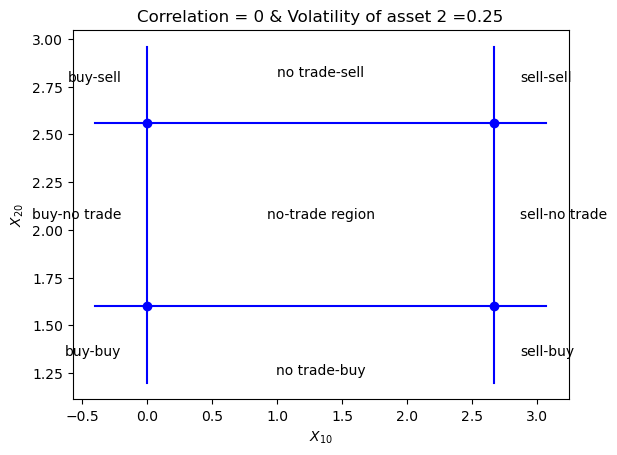

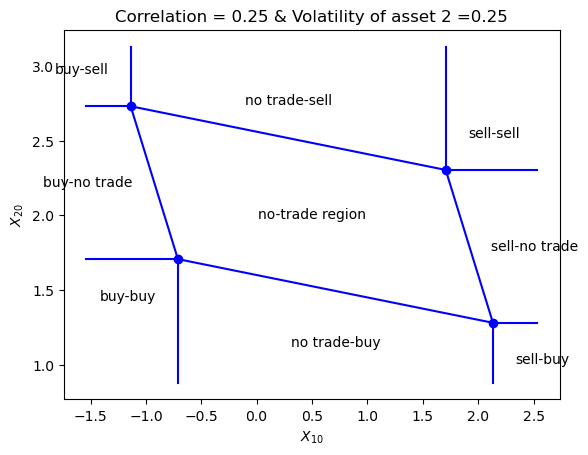

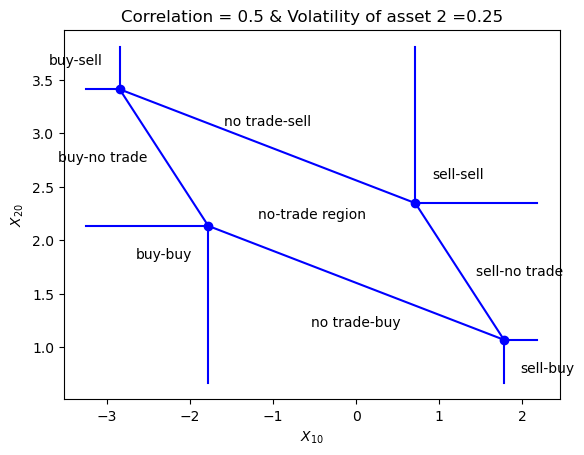

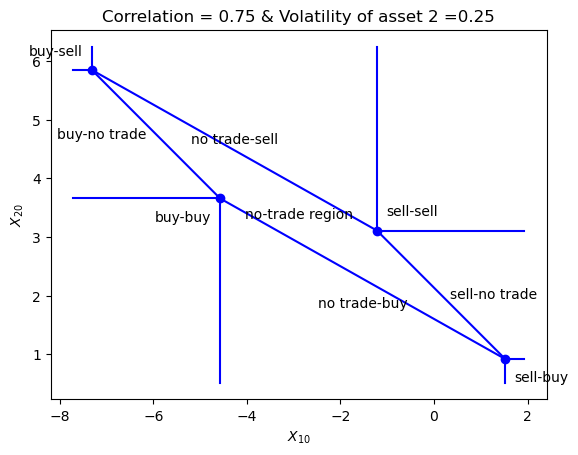

In [20]:
#Impact of correlation
print('Impact of correlation: ')
trade_regions(X0,gamma,mu,0,sigma,b)
trade_regions(X0,gamma,mu,0.25,sigma,b)
trade_regions(X0,gamma,mu,0.5,sigma,b)
trade_regions(X0,gamma,mu,0.75,sigma,b)

Impact of volatility of asset 2: 


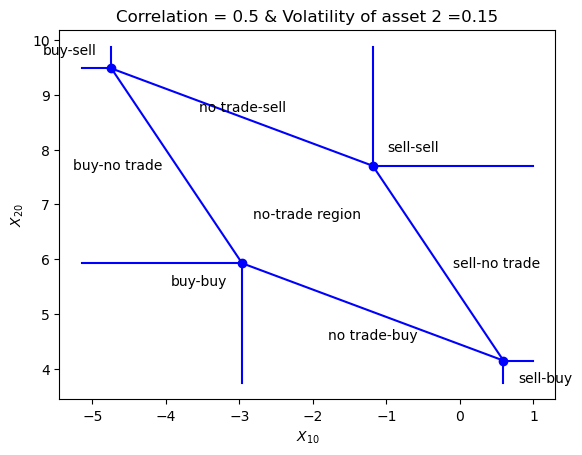

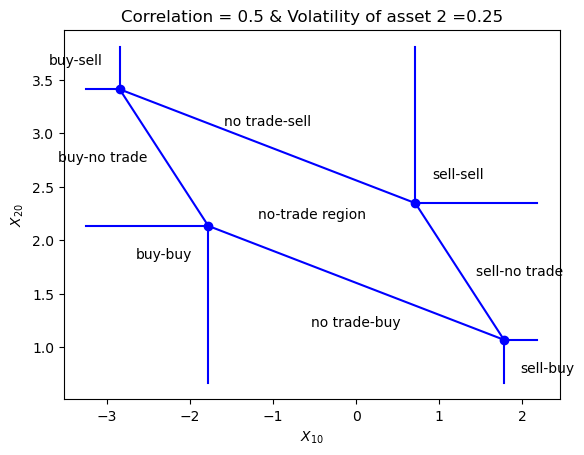

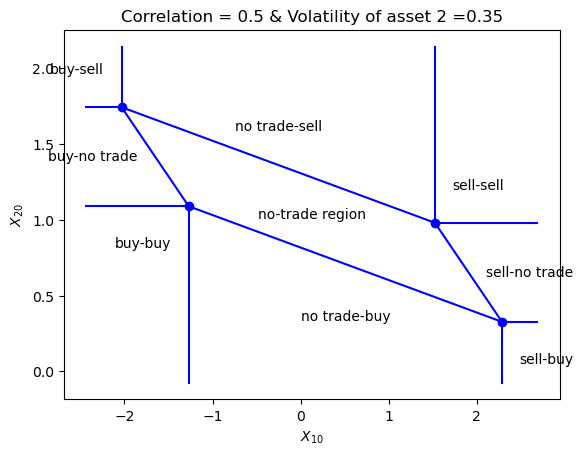

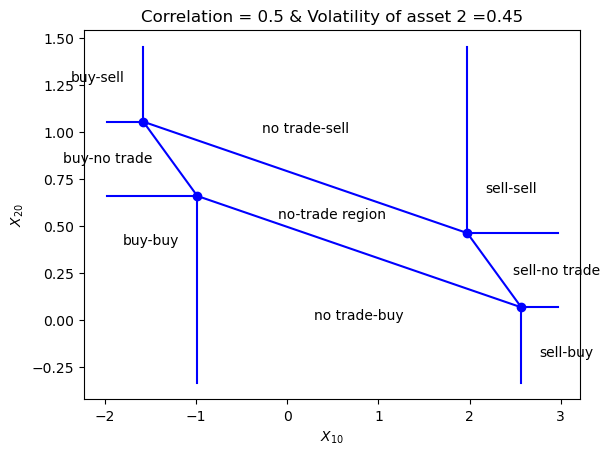

In [21]:
# Impact of volatility
print('Impact of volatility of asset 2: ')
sigma_ = np.copy(sigma)
sigma_[1] = 0.15
trade_regions(X0,gamma,mu,rho,sigma_,b)
sigma_[1] = 0.25
trade_regions(X0,gamma,mu,rho,sigma_,b)
sigma_[1] = 0.35
trade_regions(X0,gamma,mu,rho,sigma_,b)
sigma_[1] = 0.45
trade_regions(X0,gamma,mu,rho,sigma_,b)

In [22]:
#pip install --upgrade openpyxl


# Exercise 2


In [23]:
#pip install --upgrade openpyxl


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_corr = pd.read_excel('BL_data.xlsx','Sheet1',usecols=range(8),index_col=0)
df_weq  = pd.read_excel('BL_data.xlsx','Sheet1',usecols=[0,11],index_col=0)
df_sig  = pd.read_excel('BL_data.xlsx','Sheet1',usecols=[0,10],index_col=0)
df_corr = df_corr.dropna()
df_weq = df_weq.dropna()
df_sig = df_sig.dropna()
gamma   = 2
tau     = 0.03


In [25]:
N       = len(df_sig)
vec1    = np.ones((N,1))
weq     = df_weq.values.reshape((N,1))
sig     = df_sig.values.reshape((N,1))
Sigma   = np.diag([0.16 , 0.203, 0.248, 0.271, 0.21 , 0.2  , 0.187])#np.multiply(np.multiply((sig@vec1.T),df_corr.values),(vec1@sig.T))

(a)

In [26]:
mu0 = 3.5*(Sigma@weq)
display(pd.DataFrame(data=np.around(mu0,4),columns=['$\mu_0$'],index=df_weq.index))


,$\mu_0$
Australia,0.0090
Canada,0.0156
France,0.0451
Germany,0.0522
Japan,0.0853
UK,0.0868
US,0.4025


(b)

In [27]:
mu0 = gamma*(Sigma@weq)
Omega0       = tau*Sigma
mu_hat       = mu0
Sigma_hat    = Sigma+Omega0

w0 = np.linalg.inv(gamma*Sigma_hat)@mu_hat
display(pd.DataFrame(data=np.around(np.concatenate((w0,np.add(w0,-weq)),axis=1),4),columns=['$w_0$','$w_0$-$w_{eq}$'],index=df_weq.index))


,$w_0$,$w_0$-$w_{eq}$
Australia,0.0155,-0.0005
Canada,0.0214,-0.0006
France,0.0505,-0.0015
Germany,0.0534,-0.0016
Japan,0.1126,-0.0034
UK,0.1204,-0.0036
US,0.5971,-0.0179


(c)

In [28]:
q   = np.array([0.045,0.02]).reshape((2,1))
P1  = np.array([0,0,float(-weq[2]/(weq[2]+weq[5])),1,0,-float(weq[5]/(weq[2]+weq[5])),0])
P2  = np.array([0,1,0,0,0,0,-1])
P   = np.vstack((P1,P2))
Omega_q       = np.diag(np.array([0.025,0.015])*tau)

# Posterior distribution
def posterior_dist(mu0,Omega0,q,Omega_q,P):
    mu_hat     = mu0+(Omega0@P.T)@np.linalg.inv((P@Omega0)@P.T+Omega_q)@(q-P@mu0)
    Omega_hat  = Omega0-(Omega0@P.T)@np.linalg.inv(P@(Omega0@P.T)+Omega_q)@(P@Omega0)
    return mu_hat,Omega_hat
    
#Formula 1:
mu_hat,Omega_hat = posterior_dist(mu0,Omega0,q,Omega_q,P)
print('The posterior distribution of the mean return has mean:')
display(pd.DataFrame(data=np.around(mu_hat,4),columns=['$\hat{\mu}$'],index=df_weq.index))
print('and variance-covariance matrix:')
display(pd.DataFrame(data=np.around(Omega_hat,4),columns=df_weq.index,index=df_weq.index))

#Formula 2:
invOmega0  = np.linalg.inv(Omega0)
invOmega   = np.linalg.inv(Omega_q)

mu_hat2    = np.linalg.inv(invOmega0+P.T@invOmega@P)@(invOmega0@mu0+P.T@invOmega@q)
Omega_hat2 = np.linalg.inv(invOmega0+P.T@invOmega@P)

#Verify that both formulas agree:
print('The formulas on slide 11 indeed give the same answers:')
print(np.max(np.abs(mu_hat-mu_hat2)))
print(np.max(np.abs(Omega_hat-Omega_hat2)))

The posterior distribution of the mean return has mean:


C:\Users\perusset\AppData\Local\Temp\ipykernel_8440\2768130262.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  P1  = np.array([0,0,float(-weq[2]/(weq[2]+weq[5])),1,0,-float(weq[5]/(weq[2]+weq[5])),0])


,$\hat{\mu}$
Australia,0.0051
Canada,0.1298
France,0.0156
Germany,0.0674
Japan,0.0487
UK,0.0301
US,0.1187


and variance-covariance matrix:


,Australia,Canada,France,Germany,Japan,UK,US
Australia,0.0048,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Canada,0.0000,0.0030,0.0000,0.0000,0.0000,0.0000,0.0028
France,0.0000,0.0000,0.0071,0.0014,0.0000,-0.0007,0.0000
Germany,0.0000,0.0000,0.0014,0.0028,0.0000,0.0027,0.0000
Japan,0.0000,0.0000,0.0000,0.0000,0.0063,0.0000,0.0000
UK,0.0000,0.0000,-0.0007,0.0027,0.0000,0.0046,0.0000
US,0.0000,0.0028,0.0000,0.0000,0.0000,0.0000,0.0030


The formulas on slide 11 indeed give the same answers:
5.551115123125783e-17
2.168404344971009e-18


(d)

In [29]:
def black_litterman(mu0,q,Omega_q,tau,P,gamma):
    Omega0     = tau*Sigma
    Lambda     = np.linalg.inv((P@Sigma)@P.T+(1+1/tau)*Omega_q)@(q-1/(1+tau)*(P@mu0))/gamma
    w          = w0+P.T@Lambda
    return w,Lambda

ws,Lambda  = black_litterman(mu0,q,Omega_q,tau,P,gamma)

display(pd.DataFrame(data=np.around(np.concatenate((ws,np.add(ws,-w0),np.add(ws,-weq)),axis=1),4),\
     columns=['$w^*$','$w^*$-$w_0$','$w^*$-$w_{eq}$'],index=df_weq.index))


,$w^*$,$w^*$-$w_0$,$w^*$-$w_{eq}$
Australia,0.0155,0.0000,-0.0005
Canada,0.3107,0.2894,0.2887
France,0.0302,-0.0203,-0.0218
Germany,0.1221,0.0687,0.0671
Japan,0.1126,0.0000,-0.0034
UK,0.0720,-0.0484,-0.0520
US,0.3077,-0.2894,-0.3073


(e)

In [30]:
display(pd.DataFrame(data=np.around(Lambda,3),\
     columns=['view-weights'],index=['$\lambda_1$','$\lambda_2$']))

,view-weights
$\lambda_1$,0.069
$\lambda_2$,0.289


(f)

In [31]:
q   = np.array([0.045,0.02,0.055]).reshape((3,1))
P3  = np.array([0,0,0,0,1,0,0])
P   = np.vstack((P1,P2,P3))

Omega_q = np.diag(np.array([0.025,0.015,0.04])*tau)
mu_hat,Omega_hat = posterior_dist(mu0,Omega0,q,Omega_q,P)
ws,Lambda = black_litterman(mu0,q,Omega_q,tau,P,gamma)

display(pd.DataFrame(data=np.around(ws,4),\
     columns=['$w^*$'],index=df_weq.index))
display(pd.DataFrame(data=np.around(Lambda,4),\
     columns=['view-weights'],index=['$\lambda_1$','$\lambda_2$','$\lambda_3$']))


,$w^*$
Australia,0.0155
Canada,0.3107
France,0.0302
Germany,0.1221
Japan,0.1279
UK,0.0720
US,0.3077


,view-weights
$\lambda_1$,0.0687
$\lambda_2$,0.2894
$\lambda_3$,0.0153


In [32]:
q   = np.array([0.045,0.02,0.055]).reshape((3,1))
P3  = np.array([0,0,0,0,1,0,0])
P   = np.vstack((P1,P2,P3))

Omega_q = np.diag(np.array([0.025,0.015,0.01])*tau)
mu_hat,Omega_hat = posterior_dist(mu0,Omega0,q,Omega_q,P)
ws,Lambda = black_litterman(mu0,q,Omega_q,tau,P,gamma)

display(pd.DataFrame(data=np.around(ws,4),\
     columns=['$w^*$'],index=df_weq.index))
display(pd.DataFrame(data=np.around(Lambda,4),\
     columns=['view-weights'],index=['$\lambda_1$','$\lambda_2$','$\lambda_3$']))

,$w^*$
Australia,0.0155
Canada,0.3107
France,0.0302
Germany,0.1221
Japan,0.1301
UK,0.0720
US,0.3077


,view-weights
$\lambda_1$,0.0687
$\lambda_2$,0.2894
$\lambda_3$,0.0175
